In [88]:
import pandas as pd
import numpy as np
import os as os
from kaggle.api.kaggle_api_extended import KaggleApi
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
api = KaggleApi()
api.authenticate()  # This will use your credentials from the KAGGLE_CONFIG_DIR

dataset_name = "tobycrabtree/nfl-scores-and-betting-data"
api.dataset_download_files(
    dataset_name,
    path="/Users/kerouac/Desktop/project_work/programming_projects",
    unzip=True,
)

teams_dataset = pd.read_csv(
    "/Users/kerouac/Desktop/project_work/programming_projects/nfl_teams.csv",
)

In [5]:
teams_dataset

,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
2,Baltimore Colts,Colts,IND,CLT,AFC,NaN,AFC,AFC East
3,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central
4,Boston Patriots,Patriots,NE,NWE,AFC,NaN,AFC,NaN
5,Buffalo Bills,Bills,BUF,BUF,AFC,AFC East,AFC,AFC East
6,Carolina Panthers,Panthers,CAR,CAR,NFC,NFC South,NFC,NFC West
7,Chicago Bears,Bears,CHI,CHI,NFC,NFC North,NFC,NFC Central
8,Cincinnati Bengals,Bengals,CIN,CIN,AFC,AFC North,AFC,AFC Central
9,Cleveland Browns,Browns,CLE,CLE,AFC,AFC North,AFC,AFC Central


In [9]:
conferences = teams_dataset['team_conference'].unique()

In [11]:
print(conferences)

[array(['NFC', 'AFC'], dtype=object)]


In [12]:
divs = teams_dataset['team_division'].unique()

In [13]:
divs

array(['NFC West', 'NFC South', nan, 'AFC North', 'AFC East', 'NFC North',
       'NFC East', 'AFC West', 'AFC South'], dtype=object)

In [14]:
scores  = pd.read_csv('/Users/kerouac/Desktop/project_work/programming_projects/spreadspoke_scores.csv')

In [69]:
#creating a dictionary to assign teams to their respective divisions

sub1 = teams_dataset[['team_name', 'team_division']]


In [75]:
len(sub1)

44

In [83]:
# (sub1.iloc[1,:]).to_dict()
divisions_dict = {}
index = 1
for i in range(len(sub1) - 1):
    divisions_dict[sub1.iloc[index,:][0]] = sub1.iloc[index,:][1]
    index+=1





dict_keys(['Atlanta Falcons', 'Baltimore Colts', 'Baltimore Ravens', 'Boston Patriots', 'Buffalo Bills', 'Carolina Panthers', 'Chicago Bears', 'Cincinnati Bengals', 'Cleveland Browns', 'Dallas Cowboys', 'Denver Broncos', 'Detroit Lions', 'Green Bay Packers', 'Houston Oilers', 'Houston Texans', 'Indianapolis Colts', 'Jacksonville Jaguars', 'Kansas City Chiefs', 'Las Vegas Raiders', 'Los Angeles Chargers', 'Los Angeles Raiders', 'Los Angeles Rams', 'Miami Dolphins', 'Minnesota Vikings', 'New England Patriots', 'New Orleans Saints', 'New York Giants', 'New York Jets', 'Oakland Raiders', 'Philadelphia Eagles', 'Phoenix Cardinals', 'Pittsburgh Steelers', 'San Diego Chargers', 'San Francisco 49ers', 'Seattle Seahawks', 'St. Louis Cardinals', 'St. Louis Rams', 'Tampa Bay Buccaneers', 'Tennessee Oilers', 'Tennessee Titans', 'Washington Commanders', 'Washington Football Team', 'Washington Redskins'])


/var/folders/gh/qccfqk1145x7mx_dlpct6tn00000gn/T/ipykernel_57592/136101863.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  divisions_dict[sub1.iloc[index,:][0]] = sub1.iloc[index,:][1]


In [100]:
scores['division'] = scores['team_home'].map(divisions_dict)

In [101]:
scores

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,division,home_win
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN,AFC East,False
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN,NaN,True
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN,AFC West,True
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN,AFC East,False
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN,NFC North,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13783,1/7/2024,2023,18,False,New Orleans Saints,NaN,NaN,Atlanta Falcons,NaN,NaN,NaN,Caesars Superdome,False,72.0,0.0,NaN,indoor,NFC South,False
13784,1/7/2024,2023,18,False,New York Giants,NaN,NaN,Philadelphia Eagles,NaN,NaN,NaN,MetLife Stadium,False,NaN,NaN,NaN,NaN,NFC East,False
13785,1/7/2024,2023,18,False,San Francisco 49ers,NaN,NaN,Los Angeles Rams,NaN,NaN,NaN,Levi's Stadium,False,NaN,NaN,NaN,NaN,NFC West,False
13786,1/7/2024,2023,18,False,Tennessee Titans,NaN,NaN,Jacksonville Jaguars,NaN,NaN,NaN,Nissan Stadium,False,NaN,NaN,NaN,NaN,AFC South,False


In [102]:
# filtering out games without betting info

scores_1 = scores[scores['spread_favorite'].isna() == False]

In [103]:
scores_1['home_win'] = scores_1['score_home'] > scores_1['score_away']

scores_1

/var/folders/gh/qccfqk1145x7mx_dlpct6tn00000gn/T/ipykernel_57592/3055033849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_1['home_win'] = scores_1['score_home'] > scores_1['score_away']


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,division,home_win
170,1/15/1967,1966,Superbowl,True,Green Bay Packers,35.0,10.0,Kansas City Chiefs,GB,-14.0,NaN,Los Angeles Memorial Coliseum,True,54.0,7.0,90.0,NaN,NFC North,True
350,1/14/1968,1967,Superbowl,True,Green Bay Packers,33.0,14.0,Oakland Raiders,GB,-13.5,43,Orange Bowl,True,60.0,12.0,74.0,NaN,NFC North,True
538,1/12/1969,1968,Superbowl,True,Baltimore Colts,7.0,16.0,New York Jets,IND,-18.0,40,Orange Bowl,True,66.0,12.0,80.0,rain,NaN,False
727,1/11/1970,1969,Superbowl,True,Kansas City Chiefs,23.0,7.0,Minnesota Vikings,MIN,-12.0,39,Tulane Stadium,True,55.0,14.0,84.0,rain,AFC West,True
916,1/17/1971,1970,Superbowl,True,Baltimore Colts,16.0,13.0,Dallas Cowboys,IND,-2.5,36,Orange Bowl,True,59.0,11.0,60.0,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13544,9/17/2023,2023,2,False,Tampa Bay Buccaneers,27.0,17.0,Chicago Bears,TB,-2.5,41,Raymond James Stadium,False,NaN,NaN,NaN,NaN,NFC South,True
13545,9/17/2023,2023,2,False,Tennessee Titans,27.0,24.0,Los Angeles Chargers,LAC,-2.5,45.5,Nissan Stadium,False,NaN,NaN,NaN,NaN,AFC South,True
13546,9/18/2023,2023,2,False,Carolina Panthers,17.0,20.0,New Orleans Saints,NO,-3.0,39.5,Bank of America Stadium,False,NaN,NaN,NaN,NaN,NFC South,False
13547,9/18/2023,2023,2,False,Pittsburgh Steelers,26.0,22.0,Cleveland Browns,CLE,-2.0,38,Acrisure Stadium,False,NaN,NaN,NaN,NaN,AFC North,True


Text(0, 0.5, 'Wind MPH')

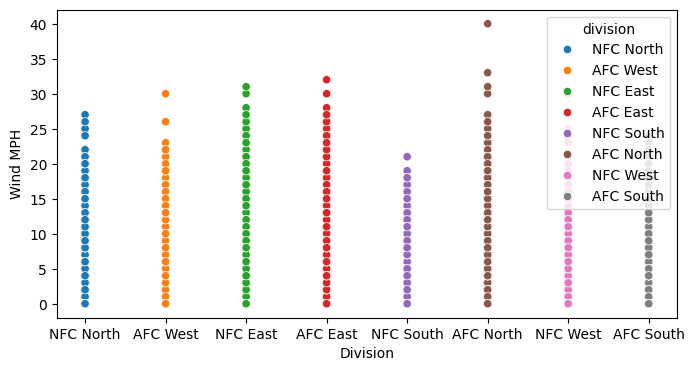

In [108]:
#comparng wind speeds across different divisions
plt.figure(figsize=(8,4))
sns.scatterplot(data = scores_1, x = 'division',  y = 'weather_wind_mph', hue = 'division')
plt.xlabel('Division')
plt.ylabel('Wind MPH')